### Questions:  
Download dataset AMZN.csv from Blackboard. This dataset consists of the daily 
closed stock price of Amazon.Inc.com from 04/Jan/2021 to 30/Dec/2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("AMZN.csv", header=0, parse_dates=True)
data

,Date,Close
0,04/01/2021,3186.629883
1,05/01/2021,3218.510010
2,06/01/2021,3138.379883
3,07/01/2021,3162.159912
4,08/01/2021,3182.699951
...,...,...
246,23/12/2021,3421.370117
247,27/12/2021,3393.389893
248,28/12/2021,3413.219971
249,29/12/2021,3384.020020


**1) (5 points) show a chart to visualize the closed stock price from 04/Jan/2021 to 
30/Dec/2021 and write some observations based on this chart.**

In [3]:
x = data['Date']
y = data['Close']

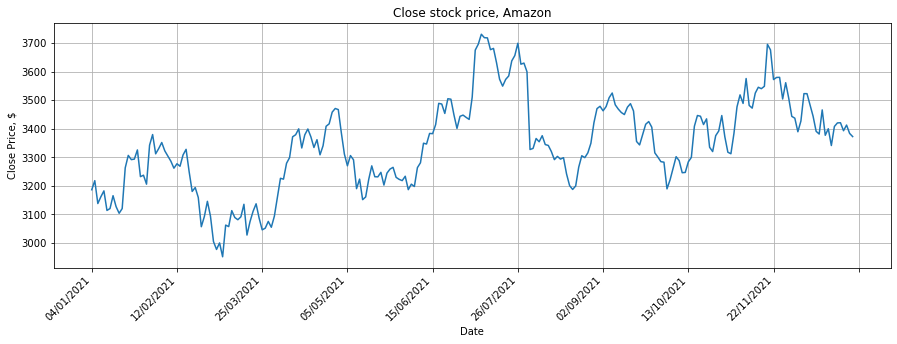

In [5]:
fig = plt.figure(figsize=[15,5])
plt.plot(x, y, label='Data');
plt.xticks(np.arange(0, 280, step=28))  # Set label locations.
fig.autofmt_xdate(rotation=45)

plt.xlabel('Date');
plt.ylabel('Close Price, $');
plt.title('Close stock price, Amazon')
# plt.legend()
plt.grid()
plt.show()

**2) (5 points) What are the characteristics of a stationary time series? Is this time 
series data in AMZN.csv likely to be stationary and why? Check it with the naked 
eye.**

Answer:

In a stationary time series the statistical properties (mean, variance, covariance) of the process generating the time series do not change over time.

The AMZN close price time series is probably not stationary because the price is likely to have experienced various patterns and will be dependent on time. By observing the graph, the AMZN time series appears to show an overall upward trend (non-stationary mean) combined with a seasonal or cyclical pattern (non-stationary variance).

**3) (5 points) Summarise the process of calculating autocorrelation function and 
partial autocorrelation function with mathematical formulations.** 

Answer:

The autocorrelation function (ACF) is the coefficient of correlation between two values in a time series. ACF is the correlation of a signal with a lagged copy of itself as a function of the lag, k. For a time series, $y_t$, the ACF is given by:

$$r_k = \frac{\Sigma_{t=k+1}^n(y-\bar{y})(y_{t-k}-\bar{y})}{\Sigma_{t=1}^n(y_t-\bar{y})^2} $$

where $r_k$ is the autocorrelation for lag $k$. The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. A lag 1 autocorrelation is the correlation between values that are one time period apart. These correlations comprise of both the direct and indirect correlations.


The partial autocorrelation function (PACF) seeks to remove these indirect correlations for selecting appropriate order of time-series statistical models (e.g., AR). Whilst the ACF finds correlations with lagged results, the PACF finds the correlations of the residuals.

The calculation for a PACF with lag 2 (k=2) is:

1. Read the time series data in to a dataframe.
- `df = read.csv(...)`
2. Add a column to the dataframe for each lagged copy of the data. For lag 2, two new columns would be added. In Python, the following code would do this:
- `df['T_(i-1)'] = df['T_i'].shift(1)` 
- `df['T_(i-2)'] = df['T_i'].shift(2)`
3. 
$$PACF(T_{i},k=2) = \frac{Cov (T_i|T_{(i−1)}, T_{(i−2)}|T_{(i−1)})}{\sigma_{T_i|T_{(i−1)}} \times \sigma _{T_{(i−2)}|T_{(i−1)}}}) $$


$T_i|T_{(i−1)}$: time series of residuals which we created from steps 1 and 2 after
fitting a linear model to the distribution of $T_i$ versus $T_{i-1}$.

$T_{(i-2)}|T_{(i-1)}$:second time series of residuals which we created from steps 1 and
2 after fitting a linear model to the distribution of $T_{i-2}$ versus $T_{i-1}$.


**4) (10 points) Plot the predicted and true stock price with the autoregressive (AR) 
model on a test set and describe your observations from this plot.**  

Requirements:

1) You need to list key steps and their results (e.g., PACF plot) to predict the stock 
price. You will lose marks if you only show the final plot about prediction;

2) You need to split this dataset into a train (70%) set and a test (30%) set. Use the train 
set to train an autoregressive (AR) model and make a prediction on the test set;

3) You need to implement the AR model from scratch rather than using the existing 
Python library.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.options.mode.chained_assignment = None  # default='warn'

/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [7]:
df=pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col=['Date'], dayfirst=True)
df.columns=['Close']
df

,Close
Date,
2021-01-04,3186.629883
2021-01-05,3218.510010
2021-01-06,3138.379883
2021-01-07,3162.159912
2021-01-08,3182.699951
...,...
2021-12-23,3421.370117
2021-12-27,3393.389893
2021-12-28,3413.219971


### Equation for AR model : <br>
$Y_{t}=c+\sum_{i=1}^{p} \varphi_{i} Y_{t-i}+\varepsilon_{t}=c+\varphi_{1} Y_{t-1}+\varphi_{2} Y_{t-2}+\ldots \ldots \ldots \ldots \ldots+\varphi_{p} Y_{t-p}+\varepsilon_{t}$

In [8]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Close'].shift(i)

  #train size = 0.7, test size = 0.3
  train_size = (int)(0.7 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Close'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]

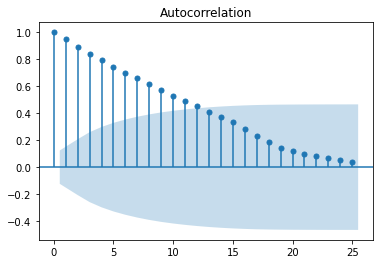

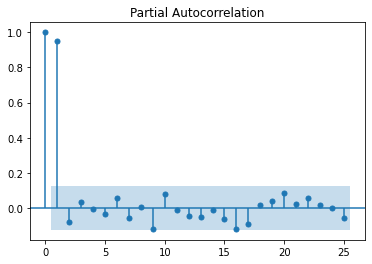

In [9]:
ACF = plot_acf(df.Close.dropna(),lags=25)
# with the PACF, we can figure out how many lags we need in the AR model.
PACF = plot_pacf(df.Close.dropna(),lags=25)

#Step 2 : Fitting AR Model

In [15]:
lag_num = 1
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

lag_num = 2
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

lag_num = 3
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

lag_num = 4
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

lag_num = 10
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

The RMSE is : 51.723358607050784 , Value of p :  1
The RMSE is : 51.82451180050663 , Value of p :  2
The RMSE is : 51.65674852167227 , Value of p :  3
The RMSE is : 52.19897954871848 , Value of p :  4
The RMSE is : 52.924555065288736 , Value of p :  10


<AxesSubplot:xlabel='Date'>

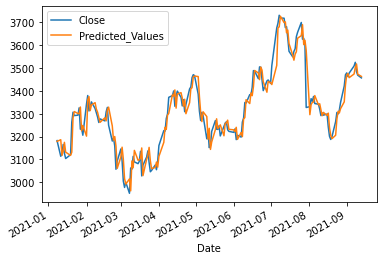

In [11]:
df_train[['Close','Predicted_Values']].plot()

<AxesSubplot:xlabel='Date'>

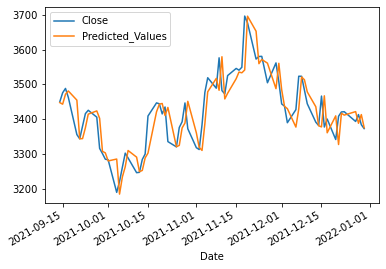

In [12]:
df_test[['Close','Predicted_Values']].plot()

**5) (5 points) What are the strengths and weaknesses of the AR model? Are there 
some ways to overcome such weaknesses?**